# CRNN, SEBlock, Adaptive Fusion

In [43]:
train_loader = DataLoader(ds["train"], batch_size=BATCH_SIZE, shuffle=True,
                          num_workers=NUM_WORKERS, collate_fn=collate_fn)
valid_loader = DataLoader(ds["validation"], batch_size=BATCH_SIZE, shuffle=False,
                          num_workers=NUM_WORKERS, collate_fn=collate_fn)
test_loader = DataLoader(ds["test"], batch_size=BATCH_SIZE, shuffle=False,
                         num_workers=NUM_WORKERS, collate_fn=collate_fn)


In [33]:
def swap_labels(example):
    example["label"] = 1 - example["label"]   # flips 0 ↔ 1
    return example

ds_test_online = ds_test_online.map(swap_labels)
ds_test_online2 = ds_test_online2.map(swap_labels)


In [4]:
! df -h


Filesystem                         Size  Used Avail Use% Mounted on
overlay                            4.0T  2.6T  1.3T  68% /
tmpfs                               64M     0   64M   0% /dev
/dev/mapper/ubuntu--vg-ubuntu--lv  4.0T  2.6T  1.3T  68% /home/jovyan
tmpfs                              378G     0  378G   0% /dev/shm
tmpfs                              378G   20K  378G   1% /home/jovyan/.jupyter/custom/custom.css
tmpfs                              189G   12K  189G   1% /proc/driver/nvidia
tmpfs                               38G  4.3M   38G   1% /run/nvidia-persistenced/socket
tmpfs                              189G     0  189G   0% /proc/acpi
tmpfs                              189G     0  189G   0% /proc/scsi
tmpfs                              189G     0  189G   0% /sys/firmware


In [3]:
! du -h --max-depth=1 ~/


104K	/home/jovyan/.npm
8.0K	/home/jovyan/.keras
88K	/home/jovyan/.jupyter
1.1M	/home/jovyan/.ipynb_checkpoints
2.9M	/home/jovyan/.ipython
8.0K	/home/jovyan/.conda
8.0K	/home/jovyan/.config
8.0K	/home/jovyan/.nv
2.5M	/home/jovyan/.local
930M	/home/jovyan/


In [29]:
! rm -rf ~/.cache/huggingface/hub/datasets--Usernameeeeee--df_462700_2


In [13]:
! ls -lisah ~/.cache/huggingface/datasets


total 16K
3545757 4.0K drwxrwsr-x 4 jovyan users 4.0K Nov 17 12:42 .
3545737 4.0K drwxrwsr-x 5 jovyan users 4.0K Oct 14 15:22 ..
3573954 4.0K drwxrwsr-x 3 jovyan users 4.0K Nov 17 08:58 Hibou-Foundation___big_ds_preprocessed_spectogram_1
3545759 4.0K drwxrwsr-x 3 jovyan users 4.0K Oct 14 15:22 Usernameeeeee___df_462700_2
3545719    0 -rw-rw-r-- 1 jovyan users    0 Nov 17 12:50 _home_jovyan_.cache_huggingface_datasets_Hibou-Foundation___big_ds_preprocessed_spectogram_1_default_0.0.0_e651a2fa208b8152db7ac29b4f2a85b6d4d608ab.lock
3545758    0 -rw-rw-r-- 1 jovyan users    0 Nov  3 22:35 _home_jovyan_.cache_huggingface_datasets_Usernameeeeee___df_462700_2_default_0.0.0_3513a23b30527320f2b61bda4ebc33f887271d44.lock
3576257    0 -rw-rw-r-- 1 jovyan users    0 Nov  3 22:35 _home_jovyan_.cache_huggingface_datasets_Usernameeeeee___drone_test_2_default_0.0.0_ac6f7dc8ffc0315265749d783d5b304001718dbb.lock
3547000    0 -rw-rw-r-- 1 jovyan users    0 Nov  3 22:35 _home_jovyan_.cache_huggingface_datas

In [5]:
pip install datasets tqdm torch torchaudio torchcodec torchmetrics transformers ffmpeg-python ffmpeg scikit-learn seaborn librosa


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 53.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 51.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.7/899.7 MB 61.8 MB/s  0:00:06m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.3/322.3 MB 52.6 MB/s  0:00:06m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.7/124.7 MB 64.9 MB/s  0:00:01m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.5/170.5 MB 75.2 MB/s  0:00:02m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 51.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 28.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 69.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 566.1/566.1 kB 15.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3

In [1]:
from pathlib import Path
from typing import Union

import pandas as pd
import torch
from cryptography.hazmat.primitives.keywrap import aes_key_wrap
from torch import nn, optim, Tensor
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torchmetrics
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_from_disk, DatasetDict, load_dataset, Dataset, ClassLabel
import torchaudio
import torchaudio.transforms as T
import random
import torchcodec
import torchaudio

SEED = 42
SAMPLE_RATE = 16000
BATCH_SIZE = 32
NUM_WORKERS = 96
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)


/opt/conda/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [17]:
# Dataset from huggingface of drones/others
ds = load_dataset("Hibou-Foundation/big_ds_preprocessed_spectogram_1")


In [ ]:
import numpy as np

def to_tensor(batch):
    batch["audio"] = [
        np.array(a, dtype=np.float32) for a in batch["audio"]
    ]
    return batch

ds = ds.map(to_tensor, batched=True, num_proc=16)


Map (num_proc=16):   7%|▋         | 62000/926240 [00:35<03:34, 4032.72 examples/s]

In [ ]:
def to_numpy(example):
    example["audio"] = np.array(example["audio"], dtype=np.float32)
    return example

ds = ds.map(to_numpy, num_proc=4)   # parallel!


In [52]:
def to_tensor(batch):
    batch["audio"] = [
        torch.tensor(a, dtype=torch.float32) for a in batch["audio"]
    ]
    return batch

ds = ds.map(to_tensor, batched=True)


Map:   2%|▏         | 19000/926240 [03:42<2:57:00, 85.42 examples/s]


KeyboardInterrupt: 

In [7]:
print(type(ds["train"][0]["audio"]))
print(type(ds["train"][0]["audio"][0]))

print(len(ds["train"][0]["audio"]))    # 1025
print(len(ds["train"][0]["audio"][0])) # 16


NameError: name 'ds' is not defined

In [ ]:
print(ds)


In [40]:
LABELS = ds["train"].features["label"]


In [41]:
print("Dataset splits:", {k: v.shape for k, v in ds.items()})
print("Label names:", LABELS.names)


Dataset splits: {'train': (926240, 2), 'validation': (118110, 2), 'test': (117865, 2)}
Label names: ['other', 'drone']


# Mel-transform and simple CRNN.

In [5]:
class AudioCNN2D(nn.Module):
    def __init__(self, n_classes):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 32, 3, 1, 1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 3, 1, 1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(64, 128, 3, 1, 1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d((1, 1)),
        )
        self.rnn_hidden_size = 64
        self.rnn = nn.RNN(
            input_size=128,
            hidden_size=self.rnn_hidden_size,
            num_layers=3,
            batch_first=True,
            bidirectional=False, #False
        )
        self.post = nn.Sequential(
            nn.Conv2d(1, 32, 3, 1, 1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 3, 1, 1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(64, 128, 3, 1, 1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d((1, 1)),
        )
        self.fc = nn.Sequential(
            nn.Linear(self.rnn_hidden_size + 128, 128),  # RNN output + post-processing features
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, n_classes)
        )

    def forward(self, x):
        # Main path: CNN -> RNN
        x_main = self.features(x)  # CNN features: (batch_size, 128, 1, 1)
        x_main = x_main.view(x_main.size(0), -1, 128)  # Reshape to (batch_size, 1, 128) for RNN
        x_main, _ = self.rnn(x_main)  # RNN output: (batch_size, 1, 128) - bidirectional
        x_main = x_main[:, -1, :]  # Take last timestep: (batch_size, 128)
        
        # Post-processing path: CNN only
        x_post = self.post(x)  # Post CNN features: (batch_size, 128, 1, 1)
        x_post = x_post.view(x_post.size(0), -1)  # Flatten: (batch_size, 128)
        
        # Concatenate both paths
        x = torch.cat([x_main, x_post], dim=1)  # (batch_size, 256)
        
        # Fully connected layer
        x = self.fc(x)  # (batch_size, n_classes)
        return x

model = AudioCNN2D(n_classes=len(LABELS.names)).to(DEVICE)
print(model)


AudioCNN2D(
  (features): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): AdaptiveAvgPool2d(output_size=(1, 1))
  )
  (rnn): RNN(128, 64, num_layers=3, batch_first=True)
  (post): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, 

# SP c'est quoi

In [ ]:
class AttentionLayer(nn.Module):
    def __init__(self, hidden_size):
        super().__init__()
        self.attention = nn.Linear(hidden_size, 1)

    def forward(self, rnn_outputs):
        # rnn_outputs: (batch_size, seq_len, hidden_size)
        attention_weights = torch.softmax(self.attention(rnn_outputs).squeeze(-1), dim=-1)
        weighted = torch.sum(rnn_outputs * attention_weights.unsqueeze(-1), dim=1)
        return weighted, attention_weights

class AudioCNN2D(nn.Module):
    def __init__(self, n_classes, bidirectional=True, use_attention=True):
        super().__init__()
        self.bidirectional = bidirectional
        
        # Enhanced CNN with residual connections
        self.conv_blocks = nn.Sequential(
            # Block 1
            nn.Conv2d(1, 64, 3, 1, 1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Dropout(0.1),
            
            # Block 2
            nn.Conv2d(64, 128, 3, 1, 1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Dropout(0.2),
            
            # Block 3
            nn.Conv2d(128, 256, 3, 1, 1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256, 256, 3, 1, 1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Dropout(0.3),
            
            # Block 4
            nn.Conv2d(256, 512, 3, 1, 1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d((1, None)),
        )
        
        # RNN
        self.rnn_hidden_size = 128
        self.rnn_layers = 2
        
        self.lstm = nn.LSTM(
            input_size=512,
            hidden_size=self.rnn_hidden_size,
            num_layers=self.rnn_layers,
            batch_first=True,
            bidirectional=bidirectional,
            dropout=0.3
        )
        
        # Attention
        self.use_attention = use_attention
        if use_attention:
            self.attention = AttentionLayer(self.rnn_hidden_size * 2 if bidirectional else self.rnn_hidden_size)
        
        # Classifier
        rnn_output_size = self.rnn_hidden_size * 2 if bidirectional else self.rnn_hidden_size
        
        self.classifier = nn.Sequential(
            nn.Linear(rnn_output_size, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, n_classes)
        )

    def forward(self, x):
        # CNN features
        x = self.conv_blocks(x)
        x = x.squeeze(2).transpose(1, 2)
        
        # RNN
        rnn_out, _ = self.lstm(x)
        
        # Attention or pooling
        if self.use_attention:
            x, _ = self.attention(rnn_out)
        else:
            x = torch.mean(rnn_out, dim=1)  # Global average pooling
        
        # Classification
        x = self.classifier(x)
        return x

# Usage
model = AudioCNN2D(
    n_classes=len(LABELS.names),
    bidirectional=True,
    use_attention=True
).to(DEVICE)


# CRNN avec SEBlock

In [ ]:
class SEBlock(nn.Module):
    def __init__(self, channels, reduction=16):
        super().__init__()
        self.fc = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.Conv2d(channels, channels // reduction, 1),
            nn.ReLU(inplace=True),
            nn.Conv2d(channels // reduction, channels, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        scale = self.fc(x)
        return x * scale

class AudioCNN2D(nn.Module):
    def __init__(self, n_classes):
        super().__init__()

        # ====== Main CNN feature extractor ======
        # Only in last stage
        self.features = nn.Sequential(
            nn.Conv2d(1, 32, 3, 1, 1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2),
        
            nn.Conv2d(32, 64, 3, 1, 1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),
        
            nn.Conv2d(64, 128, 3, 1, 1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            SEBlock(128),
            nn.AdaptiveAvgPool2d((1, 1)),
        )


        # ====== Temporal modeling (RNN) ======
        self.rnn_hidden_size = 64
        self.rnn = nn.RNN(
            input_size=128,
            hidden_size=self.rnn_hidden_size,
            num_layers=3,
            batch_first=True,
            bidirectional=False,
        )

        # ====== Secondary CNN path (post features) ======
        self.post = nn.Sequential(
            nn.Conv2d(1, 32, 3, 1, 1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            SEBlock(32),
            nn.MaxPool2d(2),

            nn.Conv2d(32, 64, 3, 1, 1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            SEBlock(64),
            nn.MaxPool2d(2),

            nn.Conv2d(64, 128, 3, 1, 1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            SEBlock(128),
            nn.AdaptiveAvgPool2d((1, 1)),
        )

        # ====== Fully connected classifier ======
        self.fc = nn.Sequential(
            nn.Linear(self.rnn_hidden_size + 128, 128),  # RNN + post CNN features
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, n_classes)
        )

    def forward(self, x):
        # === Main path: CNN -> RNN ===
        x_main = self.features(x)               # (B, 128, 1, 1)
        x_main = x_main.view(x_main.size(0), -1, 128)  # (B, 1, 128)
        x_main, _ = self.rnn(x_main)            # (B, 1, 64)
        x_main = x_main[:, -1, :]               # (B, 64)

        # === Post path: CNN only ===
        x_post = self.post(x)                   # (B, 128, 1, 1)
        x_post = x_post.view(x_post.size(0), -1)  # (B, 128)

        # === Fusion ===
        x = torch.cat([x_main, x_post], dim=1)  # (B, 192)

        # === Classification ===
        x = self.fc(x)
        return x

model = AudioCNN2D(n_classes=len(LABELS.names)).to(DEVICE)
print(model)


# CRNN SEB v2

In [39]:
class ImprovedSEBlock(nn.Module):
    def __init__(self, channels, reduction=16, activation=nn.ReLU):
        super().__init__()
        self.fc = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.Conv2d(channels, channels // reduction, 1, bias=False),
            activation(inplace=True),
            nn.Conv2d(channels // reduction, channels, 1, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        scale = self.fc(x)
        return x * scale

class SEBlock(nn.Module):
    def __init__(self, channels, reduction=16):
        super().__init__()
        self.fc = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.Conv2d(channels, channels // reduction, 1),
            nn.ReLU(inplace=True),
            nn.Conv2d(channels // reduction, channels, 1),
            nn.Sigmoid()
        )

    def forward(self, x):  # This was missing!
        scale = self.fc(x)
        return x * scale

class AudioCNN2D(nn.Module):
    def __init__(self, n_classes, dropout_rate=0.3):
        super().__init__()
        
        # ====== Main CNN feature extractor ======
        self.features = nn.Sequential(
            nn.Conv2d(1, 32, 3, 1, 1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Dropout2d(dropout_rate/2),
            nn.MaxPool2d(2),
        
            nn.Conv2d(32, 64, 3, 1, 1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Dropout2d(dropout_rate/2),
            nn.MaxPool2d(2),
        
            nn.Conv2d(64, 128, 3, 1, 1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            SEBlock(128),
            nn.Dropout2d(dropout_rate),
            nn.AdaptiveAvgPool2d((1, 1)),
        )

        # ====== Temporal modeling ======
        self.rnn_hidden_size = 64
        self.rnn = nn.GRU(  # Changed to GRU
            input_size=128,
            hidden_size=self.rnn_hidden_size,
            num_layers=2,  # Reduced layers
            batch_first=True,
            bidirectional=True,  # Add bidirectional
            dropout=dropout_rate,
        )

        # ====== Adjust for bidirectional ======
        rnn_output_size = self.rnn_hidden_size * 2  # Bidirectional

        # ====== Secondary CNN path ======
        self.post = nn.Sequential(
            nn.Conv2d(1, 32, 3, 1, 1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            SEBlock(32),
            nn.Dropout2d(dropout_rate/2),
            nn.MaxPool2d(2),

            nn.Conv2d(32, 64, 3, 1, 1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            SEBlock(64),
            nn.Dropout2d(dropout_rate/2),
            nn.MaxPool2d(2),

            nn.Conv2d(64, 128, 3, 1, 1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            SEBlock(128),
            nn.Dropout2d(dropout_rate),
            nn.AdaptiveAvgPool2d((1, 1)),
        )

        # ====== Fully connected classifier ======
        self.fc = nn.Sequential(
            nn.Linear(rnn_output_size + 128, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(128, n_classes)
        )

    def forward(self, x):
        # === Main path ===
        x_main = self.features(x)               # (B, 128, 1, 1)
        x_main = x_main.view(x_main.size(0), -1, 128)  # (B, 1, 128)
        x_main, _ = self.rnn(x_main)            # (B, 1, 128) -> (B, 1, 128) for bidirectional
        x_main = x_main[:, -1, :]               # (B, 128)

        # === Post path ===
        x_post = self.post(x)                   # (B, 128, 1, 1)
        x_post = x_post.view(x_post.size(0), -1)  # (B, 128)

        # === Fusion ===
        x = torch.cat([x_main, x_post], dim=1)  # (B, 128 + 128) = (B, 256)

        # === Classification ===
        x = self.fc(x)
        return x

model = AudioCNN2D(n_classes=len(LABELS.names)).to(DEVICE)
print(model)


AudioCNN2D(
  (features): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout2d(p=0.15, inplace=False)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): ReLU()
    (8): Dropout2d(p=0.15, inplace=False)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU()
    (13): SEBlock(
      (fc): Sequential(
        (0): AdaptiveAvgPool2d(output_size=1)
        (1): Conv2d(128, 8, kernel_size=(1, 1), stride=(1, 1))
        (2): R

# CRNN, SEBlock, Adaptive Fusion

In [ ]:
class SEBlock(nn.Module):
    def __init__(self, channels, reduction=16):
        super().__init__()
        self.fc = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.Conv2d(channels, channels // reduction, 1),
            nn.ReLU(inplace=True),
            nn.Conv2d(channels // reduction, channels, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        scale = self.fc(x)
        return x * scale

class AudioCNN2D(nn.Module):
    def __init__(self, n_classes):
        super().__init__()

        # ====== Main CNN feature extractor ======
        # Only in last stage
        self.features = nn.Sequential(
            nn.Conv2d(1, 32, 3, 1, 1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2),
        
            nn.Conv2d(32, 64, 3, 1, 1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),
        
            nn.Conv2d(64, 128, 3, 1, 1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            SEBlock(128),
            nn.AdaptiveAvgPool2d((1, 1)),
        )


        # ====== Temporal modeling (RNN) ======
        self.rnn_hidden_size = 64
        self.rnn = nn.RNN(
            input_size=128,
            hidden_size=self.rnn_hidden_size,
            num_layers=3,
            batch_first=True,
            bidirectional=False,
        )

        # ====== Secondary CNN path (post features) ======
        self.post = nn.Sequential(
            nn.Conv2d(1, 32, 3, 1, 1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            SEBlock(32),
            nn.MaxPool2d(2),

            nn.Conv2d(32, 64, 3, 1, 1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            SEBlock(64),
            nn.MaxPool2d(2),

            nn.Conv2d(64, 128, 3, 1, 1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            SEBlock(128),
            nn.AdaptiveAvgPool2d((1, 1)),
        )

        # ====== Fully connected classifier ======
        #self.fc = nn.Sequential(
        #    nn.Linear(self.rnn_hidden_size + 128, 128),  # RNN + post CNN features
        self.fc = nn.Sequential(
            nn.Linear(256, 128),  # x_fused (128) + x_post (128)
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, n_classes)
        )

        self.fusion_gate = nn.Sequential(
            nn.Linear(self.rnn_hidden_size + 128, 128),
            nn.ReLU(),
            nn.Linear(128, 2),
            nn.Softmax(dim=1)
        )

        self.proj_rnn = nn.Linear(self.rnn_hidden_size, 128)

    def forward(self, x):
        # === Main path: CNN -> RNN ===
        x_main = self.features(x)               # (B, 128, 1, 1)
        x_main = x_main.view(x_main.size(0), -1, 128)  # (B, 1, 128)
        x_main, _ = self.rnn(x_main)            # (B, 1, 64)
        x_main = x_main[:, -1, :]               # (B, 64)

        # === Post path: CNN only ===
        x_post = self.post(x)                   # (B, 128, 1, 1)
        x_post = x_post.view(x_post.size(0), -1)  # (B, 128)

        # === Fusion ===
        #x = torch.cat([x_main, x_post], dim=1)  # (B, 192)

        # Project RNN output to 128 dims
        x_main_proj = self.proj_rnn(x_main)  # (B, 128)
        
        fusion_weights = self.fusion_gate(torch.cat([x_main, x_post], dim=1))  # (B, 2)
        alpha_rnn = fusion_weights[:, 0].unsqueeze(1)
        alpha_cnn = fusion_weights[:, 1].unsqueeze(1)
        
        x_fused = alpha_rnn * x_main_proj + alpha_cnn * x_post  # now both (B, 128)
        x = self.fc(torch.cat([x_fused, x_post], dim=1))

        # === Classification ===
        #x = self.fc(x)
        return x

model = AudioCNN2D(n_classes=len(LABELS.names)).to(DEVICE)
print(model)


In [ ]:
class AudioCNN2D(nn.Module):
    def __init__(self, n_classes):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 32, 3, 1, 1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 3, 1, 1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(64, 128, 3, 1, 1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d((1, 1)),
        )
        self.rnn_hidden_size = 64
        self.rnn = nn.RNN(
            input_size=128,
            hidden_size=self.rnn_hidden_size,
            num_layers=3,
            batch_first=True,
            bidirectional=False,
        )
        self.post = nn.Sequential(
            nn.Conv2d(1, 32, 3, 1, 1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 3, 1, 1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(64, 128, 3, 1, 1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d((1, 1)),
        )
        self.rnn2 = nn.RNN(
            input_size=128,
            hidden_size=self.rnn_hidden_size,
            num_layers=3,
            batch_first=True,
            bidirectional=False,
        )
        self.post2 = nn.Sequential(
            nn.Conv2d(1, 32, 3, 1, 1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 3, 1, 1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(64, 128, 3, 1, 1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d((1, 1)),
        )
        self.fc = nn.Sequential(
            nn.Linear(self.rnn_hidden_size + 128, 128),  # RNN output + post-processing features
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, n_classes)
        )

    def forward(self, x):
        # Main path: CNN -> RNN
        x_main = self.features(x)  # CNN features: (batch_size, 128, 1, 1)
        x_main = x_main.view(x_main.size(0), -1, 128)  # Reshape to (batch_size, 1, 128) for RNN
        x_main, _ = self.rnn(x_main)  # RNN output: (batch_size, 1, 128) - bidirectional
        x_main = x_main[:, -1, :]  # Take last timestep: (batch_size, 128)
        
        # Post-processing path: CNN only
        x_post = self.post(x)  # Post CNN features: (batch_size, 128, 1, 1)
        x_post = x_post.view(x_post.size(0), -1)  # Flatten: (batch_size, 128)
        
        # Concatenate both paths
        x = torch.cat([x_main, x_post], dim=1)  # (batch_size, 256)
        
        # Fully connected layer
        x = self.fc(x)  # (batch_size, n_classes)
        return x

model = AudioCNN2D(n_classes=len(LABELS.names)).to(DEVICE)
print(model)


# CRNN, SEBlock, Adaptive Pooling

In [ ]:
class AdaptiveAttentionPool2d(nn.Module):
    def __init__(self, in_channels):
        super().__init__()
        self.attn = nn.Conv2d(in_channels, 1, kernel_size=1)

    def forward(self, x):
        weights = torch.softmax(self.attn(x).view(x.size(0), -1), dim=1)
        x = (x.view(x.size(0), x.size(1), -1) * weights.unsqueeze(1)).sum(dim=-1)
        return x.unsqueeze(-1).unsqueeze(-1)

class SEBlock(nn.Module):
    def __init__(self, channels, reduction=16):
        super().__init__()
        self.fc = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.Conv2d(channels, channels // reduction, 1),
            nn.ReLU(inplace=True),
            nn.Conv2d(channels // reduction, channels, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        scale = self.fc(x)
        return x * scale

class AudioCNN2D(nn.Module):
    def __init__(self, n_classes):
        super().__init__()

        # ====== Main CNN feature extractor ======
        # Only in last stage
        self.features = nn.Sequential(
            nn.Conv2d(1, 32, 3, 1, 1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2),
        
            nn.Conv2d(32, 64, 3, 1, 1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),
        
            nn.Conv2d(64, 128, 3, 1, 1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            SEBlock(128),
            AdaptiveAttentionPool2d(128),
        )


        # ====== Temporal modeling (RNN) ======
        self.rnn_hidden_size = 64
        self.rnn = nn.RNN(
            input_size=128,
            hidden_size=self.rnn_hidden_size,
            num_layers=3,
            batch_first=True,
            bidirectional=False,
        )

        # ====== Secondary CNN path (post features) ======
        self.post = nn.Sequential(
            nn.Conv2d(1, 32, 3, 1, 1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            SEBlock(32),
            nn.MaxPool2d(2),

            nn.Conv2d(32, 64, 3, 1, 1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            SEBlock(64),
            nn.MaxPool2d(2),

            nn.Conv2d(64, 128, 3, 1, 1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            SEBlock(128),
            AdaptiveAttentionPool2d(128),
        )

        # ====== Fully connected classifier ======
        self.fc = nn.Sequential(
            nn.Linear(self.rnn_hidden_size + 128, 128),  # RNN + post CNN features
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, n_classes)
        )

    def forward(self, x):
        # === Main path: CNN -> RNN ===
        x_main = self.features(x)               # (B, 128, 1, 1)
        x_main = x_main.view(x_main.size(0), -1, 128)  # (B, 1, 128)
        x_main, _ = self.rnn(x_main)            # (B, 1, 64)
        x_main = x_main[:, -1, :]               # (B, 64)

        # === Post path: CNN only ===
        x_post = self.post(x)                   # (B, 128, 1, 1)
        x_post = x_post.view(x_post.size(0), -1)  # (B, 128)

        # === Fusion ===
        x = torch.cat([x_main, x_post], dim=1)  # (B, 192)

        # === Classification ===
        x = self.fc(x)
        return x

model = AudioCNN2D(n_classes=len(LABELS.names)).to(DEVICE)
print(model)


# CRNN L2 SEB

In [ ]:
import torch
import torch.nn as nn

# --- SE Block ---
class SEBlock(nn.Module):
    def __init__(self, channels, reduction=16):
        super().__init__()
        self.fc = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.Conv2d(channels, channels // reduction, 1),
            nn.ReLU(inplace=True),
            nn.Conv2d(channels // reduction, channels, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        scale = self.fc(x)
        return x * scale


# --- AudioCNN2D ---
class AudioCNN2D(nn.Module):
    def __init__(self, n_classes):
        super().__init__()

        # ===== Main CNN feature extractor =====
        self.features = nn.Sequential(
            nn.Conv2d(1, 32, 3, 1, 1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(32, 64, 3, 1, 1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(64, 128, 3, 1, 1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            SEBlock(128),
            nn.AdaptiveAvgPool2d((1, 1)),
        )

        # ===== RNN temporal modeling =====
        self.rnn_hidden_size = 64
        self.rnn = nn.RNN(
            input_size=128,
            hidden_size=self.rnn_hidden_size,
            num_layers=3,
            batch_first=True,
        )

        # ===== Secondary CNN path (post features) =====
        self.post = nn.Sequential(
            nn.Conv2d(1, 32, 3, 1, 1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            SEBlock(32),
            nn.MaxPool2d(2),

            nn.Conv2d(32, 64, 3, 1, 1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            SEBlock(64),
            nn.MaxPool2d(2),

            nn.Conv2d(64, 128, 3, 1, 1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            SEBlock(128),
            nn.AdaptiveAvgPool2d((1, 1)),
        )

        # ===== Fully connected classifier =====
        self.fc = nn.Sequential(
            nn.Linear(self.rnn_hidden_size + 128, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, n_classes)
        )

    def forward(self, x):
        # --- Main path: CNN → RNN ---
        x_main = self.features(x)                  # (B, 128, 1, 1)
        x_main = x_main.view(x_main.size(0), -1, 128)  # (B, 1, 128)
        x_main, _ = self.rnn(x_main)
        x_main = x_main[:, -1, :]                  # (B, 64)

        # --- Post path: CNN only ---
        x_post = self.post(x)                      # (B, 128, 1, 1)
        x_post = x_post.view(x_post.size(0), -1)   # (B, 128)

        # --- Fusion ---
        x = torch.cat([x_main, x_post], dim=1)     # (B, 192)

        # --- Classification ---
        x = self.fc(x)
        return x

model = AudioCNN2D(n_classes=len(LABELS.names)).to(DEVICE)
print(model)


# CRNN L2

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class AudioCNN2D(nn.Module):
    def __init__(self, n_classes):
        super().__init__()

        # --- CNN feature extractor (keeps time resolution) ---
        self.features = nn.Sequential(
            nn.Conv2d(1, 32, 3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d((2, 2)),   # downsample both freq & time

            nn.Conv2d(32, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d((2, 2)),

            nn.Conv2d(64, 128, 3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            # (no adaptive pooling here — keep time dimension)
        )

        # --- First RNN over temporal dimension ---
        self.rnn_hidden_size = 128
        self.rnn = nn.RNN(
            input_size=128,  # from CNN output channels
            hidden_size=self.rnn_hidden_size,
            num_layers=2,
            batch_first=True,
            bidirectional=True
        )

        # --- Post CNN path (second branch) ---
        self.post = nn.Sequential(
            nn.Conv2d(1, 32, 3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d((2, 2)),

            nn.Conv2d(32, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d((2, 2)),

            nn.Conv2d(64, 128, 3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
        )

        # --- Second RNN after post-processing ---
        self.rnn2_hidden_size = 128
        self.rnn2 = nn.RNN(
            input_size=128,
            hidden_size=self.rnn2_hidden_size,
            num_layers=2,
            batch_first=True,
            bidirectional=True
        )

        # --- Final post2 path for compact feature extraction ---
        self.post2 = nn.Sequential(
            nn.Conv2d(1, 32, 3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(64, 128, 3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d((1, 1))
        )

        # --- Fully connected classifier ---
        # We have: rnn (256), rnn2 (256), post2 (128)
        self.fc = nn.Sequential(
            nn.Linear(self.rnn_hidden_size * 2 + self.rnn2_hidden_size * 2 + 128, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, n_classes)
        )

    def forward(self, x):
        """
        x: (B, 1, F, T)
        """

        # --- Path 1: CNN -> RNN ---
        feat = self.features(x)        # (B, 128, F', T')
        feat_seq = feat.mean(dim=2)    # average over freq → (B, 128, T')
        feat_seq = feat_seq.permute(0, 2, 1)  # (B, T', 128)
        out_rnn, _ = self.rnn(feat_seq)
        out_rnn_last = out_rnn[:, -1, :]      # (B, 256)

        # --- Path 2: Post CNN -> RNN2 ---
        post_feat = self.post(x)       # (B, 128, F', T')
        post_seq = post_feat.mean(dim=2).permute(0, 2, 1)  # (B, T', 128)
        out_rnn2, _ = self.rnn2(post_seq)
        out_rnn2_last = out_rnn2[:, -1, :]    # (B, 256)

        # --- Path 3: Static CNN (post2) ---
        post2_feat = self.post2(x)     # (B, 128, 1, 1)
        post2_feat = post2_feat.view(post2_feat.size(0), -1)  # (B, 128)

        # --- Fusion ---
        fused = torch.cat([out_rnn_last, out_rnn2_last, post2_feat], dim=1)  # (B, 256+256+128=640)

        # --- Classification ---
        out = self.fc(fused)
        return out


model = AudioCNN2D(n_classes=len(LABELS.names)).to(DEVICE)
print(model)


# CRNN SEBAP v2

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# --- Squeeze-and-Excitation Block ---
class SEBlock(nn.Module):
    def __init__(self, channels, reduction=16):
        super().__init__()
        self.fc = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.Conv2d(channels, channels // reduction, 1),
            nn.ReLU(inplace=True),
            nn.Conv2d(channels // reduction, channels, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        scale = self.fc(x)
        return x * scale


# --- Main Model ---
class AudioCNN2D(nn.Module):
    def __init__(self, n_classes):
        super().__init__()

        # ===== CNN feature extractor (keeps time dimension) =====
        self.features = nn.Sequential(
            nn.Conv2d(1, 32, 3, 1, 1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            SEBlock(32),
            nn.MaxPool2d((2, 1)),  # ↓ freq only

            nn.Conv2d(32, 64, 3, 1, 1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            SEBlock(64),
            nn.MaxPool2d((2, 1)),  # ↓ freq only

            nn.Conv2d(64, 128, 3, 1, 1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            SEBlock(128),
            # no pooling over time — keep temporal info
        )

        # ===== Secondary CNN path =====
        self.post = nn.Sequential(
            nn.Conv2d(1, 32, 3, 1, 1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            SEBlock(32),
            nn.MaxPool2d(2),

            nn.Conv2d(32, 64, 3, 1, 1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            SEBlock(64),
            nn.MaxPool2d(2),

            nn.Conv2d(64, 128, 3, 1, 1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            SEBlock(128),
            nn.AdaptiveAvgPool2d((1, 1)),
        )

        # ===== RNN (temporal modeling) =====
        self.rnn_hidden_size = 64
        self.rnn = nn.RNN(
            input_size=128,
            hidden_size=self.rnn_hidden_size,
            num_layers=3,
            batch_first=True,
            bidirectional=False
        )

        # ===== Fully connected classifier =====
        self.fc = nn.Sequential(
            nn.Linear(self.rnn_hidden_size + 128, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, n_classes)
        )

    def forward(self, x):
        """
        Input shape: (B, 1, F, T)
        F = frequency bins
        T = time frames
        """

        # === CNN preserving time ===
        x_feat = self.features(x)  # (B, 128, F', T)

        # Prepare for RNN: collapse frequency, keep time
        x_feat = x_feat.mean(dim=2)        # average over freq → (B, 128, T)
        x_feat = x_feat.permute(0, 2, 1)   # (B, T, 128)

        # === RNN over time ===
        x_rnn, _ = self.rnn(x_feat)        # (B, T, 64)
        x_rnn = x_rnn[:, -1, :]            # last time step → (B, 64)

        # === Secondary CNN path ===
        x_post = self.post(x)              # (B, 128, 1, 1)
        x_post = x_post.view(x_post.size(0), -1)  # (B, 128)

        # === Fusion ===
        x_cat = torch.cat([x_rnn, x_post], dim=1)  # (B, 64 + 128)

        # === Classification ===
        x_out = self.fc(x_cat)
        return x_out

model = AudioCNN2D(n_classes=len(LABELS.names)).to(DEVICE)
print(model)


# CRNN SEB M

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# --- SE Block ---
class SEBlock(nn.Module):
    def __init__(self, channels, reduction=16):
        super().__init__()
        self.fc = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.Conv2d(channels, channels // reduction, 1),
            nn.ReLU(inplace=True),
            nn.Conv2d(channels // reduction, channels, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        scale = self.fc(x)
        return x * scale


# --- CNN + RNN block (CRNN layer) ---
class CRNNLayer(nn.Module):
    def __init__(self, in_channels, cnn_out_channels, rnn_hidden_size):
        super().__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(in_channels, 32, 3, 1, 1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            SEBlock(32),
            nn.MaxPool2d((2, 1)),  # downsample frequency only

            nn.Conv2d(32, cnn_out_channels, 3, 1, 1),
            nn.BatchNorm2d(cnn_out_channels),
            nn.ReLU(),
            SEBlock(cnn_out_channels)
        )
        self.rnn = nn.RNN(
            input_size=cnn_out_channels,
            hidden_size=rnn_hidden_size,
            num_layers=2,
            batch_first=True,
        )

    def forward(self, x):
        """
        x: (B, 1, F, T)
        """
        x_cnn = self.cnn(x)             # (B, C, F', T)
        x_seq = x_cnn.mean(dim=2)       # average freq → (B, C, T)
        x_seq = x_seq.permute(0, 2, 1)  # (B, T, C)
        x_rnn, _ = self.rnn(x_seq)      # (B, T, H)
        x_rnn_last = x_rnn[:, -1, :]    # (B, H)
        return x_rnn_last, x_cnn        # both temporal summary + feature map


# --- Full Model ---
class AudioCNN2D(nn.Module):
    def __init__(self, n_classes):
        super().__init__()
        self.rnn_hidden_size = 64

        # CRNN Layer 1
        self.crnn1 = CRNNLayer(in_channels=1, cnn_out_channels=64, rnn_hidden_size=self.rnn_hidden_size)

        # CRNN Layer 2 (gets both input + CRNN1 output)
        self.crnn2 = CRNNLayer(in_channels=1 + 64, cnn_out_channels=128, rnn_hidden_size=self.rnn_hidden_size)

        # Optional post-CNN path (static spatial info)
        self.post = nn.Sequential(
            nn.Conv2d(1, 32, 3, 1, 1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            SEBlock(32),
            nn.MaxPool2d(2),

            nn.Conv2d(32, 64, 3, 1, 1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            SEBlock(64),
            nn.MaxPool2d(2),

            nn.Conv2d(64, 128, 3, 1, 1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            SEBlock(128),
            nn.AdaptiveAvgPool2d((1, 1))
        )

        # Final classification layer
        self.fc = nn.Sequential(
            nn.Linear(self.rnn_hidden_size + 128, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, n_classes)
        )

    def forward(self, x):
        """
        Input: (B, 1, F, T)
        """

        # --- CRNN Layer 1 ---
        out1, feat1 = self.crnn1(x)  # feat1: (B, 64, F', T)

        # --- Prepare input for CRNN Layer 2 ---
        # Tile CRNN1's CNN feature mean along channel dimension
        feat1_upsampled = F.interpolate(feat1, size=x.shape[2:], mode='bilinear', align_corners=False)
        x_cat = torch.cat([x, feat1_upsampled], dim=1)  # (B, 1+64, F, T)

        # --- CRNN Layer 2 ---
        out2, _ = self.crnn2(x_cat)

        # --- Post CNN path ---
        x_post = self.post(x)
        x_post = x_post.view(x_post.size(0), -1)  # (B, 128)

        # --- Fusion ---
        x_fused = torch.cat([out2, x_post], dim=1)  # (B, 64 + 128)

        # --- Classification ---
        x_out = self.fc(x_fused)
        return x_out

model = AudioCNN2D(n_classes=len(LABELS.names)).to(DEVICE)
print(model)


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# --- SE Block ---
class SEBlock(nn.Module):
    def __init__(self, channels, reduction=16):
        super().__init__()
        self.fc = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.Conv2d(channels, channels // reduction, 1),
            nn.ReLU(inplace=True),
            nn.Conv2d(channels // reduction, channels, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        scale = self.fc(x)
        return x * scale


# --- CNN + RNN block (CRNN layer) ---
class CRNNLayer(nn.Module):
    def __init__(self, in_channels, cnn_out_channels, rnn_hidden_size):
        super().__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(in_channels, 32, 3, 1, 1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            SEBlock(32),
            nn.MaxPool2d((2, 1)),  # downsample frequency only

            nn.Conv2d(32, cnn_out_channels, 3, 1, 1),
            nn.BatchNorm2d(cnn_out_channels),
            nn.ReLU(),
            SEBlock(cnn_out_channels)
        )
        self.rnn = nn.RNN(
            input_size=cnn_out_channels,
            hidden_size=rnn_hidden_size,
            num_layers=2,
            batch_first=True,
        )

    def forward(self, x):
        """
        x: (B, 1, F, T)
        """
        x_cnn = self.cnn(x)             # (B, C, F', T)
        x_seq = x_cnn.mean(dim=2)       # average freq → (B, C, T)
        x_seq = x_seq.permute(0, 2, 1)  # (B, T, C)
        x_rnn, _ = self.rnn(x_seq)      # (B, T, H)
        x_rnn_last = x_rnn[:, -1, :]    # (B, H)
        return x_rnn_last, x_cnn        # both temporal summary + feature map


# --- Full Model ---
class AudioCRNNFusion(nn.Module):
    def __init__(self, n_classes):
        super().__init__()
        self.rnn_hidden_size = 64

        # CRNN Layer 1
        self.crnn1 = CRNNLayer(in_channels=1, cnn_out_channels=64, rnn_hidden_size=self.rnn_hidden_size)

        # CRNN Layer 2 (gets both input + CRNN1 output)
        self.crnn2 = CRNNLayer(in_channels=1 + 64, cnn_out_channels=128, rnn_hidden_size=self.rnn_hidden_size)

        # Optional post-CNN path (static spatial info)
        self.post = nn.Sequential(
            nn.Conv2d(1, 32, 3, 1, 1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            SEBlock(32),
            nn.MaxPool2d(2),

            nn.Conv2d(32, 64, 3, 1, 1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            SEBlock(64),
            nn.MaxPool2d(2),

            nn.Conv2d(64, 128, 3, 1, 1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            SEBlock(128),
            nn.AdaptiveAvgPool2d((1, 1))
        )

        # Final classification layer
        self.fc = nn.Sequential(
            nn.Linear(self.rnn_hidden_size + 128, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, n_classes)
        )

    def forward(self, x):
        """
        Input: (B, 1, F, T)
        """

        # --- CRNN Layer 1 ---
        out1, feat1 = self.crnn1(x)  # feat1: (B, 64, F', T)

        # --- Prepare input for CRNN Layer 2 ---
        # Tile CRNN1's CNN feature mean along channel dimension
        feat1_upsampled = F.interpolate(feat1, size=x.shape[2:], mode='bilinear', align_corners=False)
        x_cat = torch.cat([x, feat1_upsampled], dim=1)  # (B, 1+64, F, T)

        # --- CRNN Layer 2 ---
        out2, _ = self.crnn2(x_cat)

        # --- Post CNN path ---
        x_post = self.post(x)
        x_post = x_post.view(x_post.size(0), -1)  # (B, 128)

        # --- Fusion ---
        x_fused = torch.cat([out2, x_post], dim=1)  # (B, 64 + 128)

        # --- Classification ---
        x_out = self.fc(x_fused)
        return x_out

model = AudioCNN2D(n_classes=len(LABELS.names)).to(DEVICE)
print(model)


# Setup for multi GPUs

In [10]:
if torch.cuda.device_count() > 1:
    print("Using", torch.cuda.device_count(), "GPUs")
    model = nn.DataParallel(model)

model.to('cuda')


Using 2 GPUs


DataParallel(
  (module): AudioCNN2D(
    (features): Sequential(
      (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (6): ReLU()
      (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (10): ReLU()
      (11): AdaptiveAvgPool2d(output_size=(1, 1))
    )
    (rnn): RNN(128, 64, num_layers=3, batch_first=True)
    (post): Sequential(
      (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), paddin

In [42]:
def collate_fn(batch):
    # Convert Python lists → tensors (2D each)
    audios = [torch.tensor(b["audio"], dtype=torch.float32) for b in batch]
    labels = torch.tensor([b["label"] for b in batch])

    # All have shape (F, T) but T varies → pad along T
    max_T = max(a.shape[1] for a in audios)
    F = audios[0].shape[0]  # always 1025

    # Allocate padded tensor
    xs = torch.zeros((len(audios), 1, F, max_T), dtype=torch.float32)

    for i, a in enumerate(audios):
        T = a.shape[1]
        xs[i, 0, :, :T] = a  # pad only the time axis

    return xs, labels


In [43]:
train_loader = DataLoader(ds["train"], batch_size=BATCH_SIZE, shuffle=True,
                          num_workers=NUM_WORKERS, collate_fn=collate_fn)
valid_loader = DataLoader(ds["validation"], batch_size=BATCH_SIZE, shuffle=False,
                          num_workers=NUM_WORKERS, collate_fn=collate_fn)
test_loader = DataLoader(ds["test"], batch_size=BATCH_SIZE, shuffle=False,
                         num_workers=NUM_WORKERS, collate_fn=collate_fn)


In [44]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10)
metric_acc = torchmetrics.classification.MulticlassAccuracy(num_classes=len(LABELS.names)).to(DEVICE)


In [ ]:
EPOCHS = 5
best_val_acc = 0

for epoch in range(EPOCHS):
    model.train()
    train_loss, train_acc = 0, 0

    for x, y in tqdm(train_loader, desc=f"Epoch {epoch+1}/{EPOCHS} [Train]"):
        x, y = x.to(DEVICE), y.to(DEVICE)
        optimizer.zero_grad()
        out = model(x)
        loss = criterion(out, y)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * x.size(0)
        train_acc += metric_acc(out, y) * x.size(0)

    scheduler.step()
    train_loss /= len(ds["train"])
    train_acc = train_acc / len(ds["train"])

    # Validation
    model.eval()
    val_loss, val_acc = 0, 0
    with torch.no_grad():
        for x, y in tqdm(valid_loader, desc=f"Epoch {epoch+1}/{EPOCHS} [Valid]"):
            x, y = x.to(DEVICE), y.to(DEVICE)
            out = model(x)
            loss = criterion(out, y)
            val_loss += loss.item() * x.size(0)
            val_acc += metric_acc(out, y) * x.size(0)

    val_loss /= len(ds["validation"])
    val_acc = val_acc / len(ds["validation"])

    print(f"Epoch {epoch+1}/{EPOCHS} | Train Loss: {train_loss:.4f} | "
          f"Train Acc: {train_acc:.4f} | Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")

    # Save best model
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), "best_model_2dcnn_clean.pt")
        print("✅ Saved new best model!")


In [47]:
model.load_state_dict(torch.load("./best_model_2dcnn_clean.pt"))
model.eval()


AudioCNN2D(
  (features): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout2d(p=0.15, inplace=False)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): ReLU()
    (8): Dropout2d(p=0.15, inplace=False)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU()
    (13): SEBlock(
      (fc): Sequential(
        (0): AdaptiveAvgPool2d(output_size=1)
        (1): Conv2d(128, 8, kernel_size=(1, 1), stride=(1, 1))
        (2): R

In [49]:
y_true, y_pred = [], []

with torch.no_grad():
    for x, y in tqdm(test_loader, desc="Testing"):
        x, y = x.to(DEVICE), y.to(DEVICE)
        out = model(x)
        preds = out.argmax(dim=1)
        y_true.extend(y.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())


Testing: 100%|██████████| 3684/3684 [00:43<00:00, 83.86it/s] 


              precision    recall  f1-score   support

       other      0.991     0.993     0.992     85226
       drone      0.982     0.977     0.980     32639

    accuracy                          0.989    117865
   macro avg      0.987     0.985     0.986    117865
weighted avg      0.989     0.989     0.989    117865



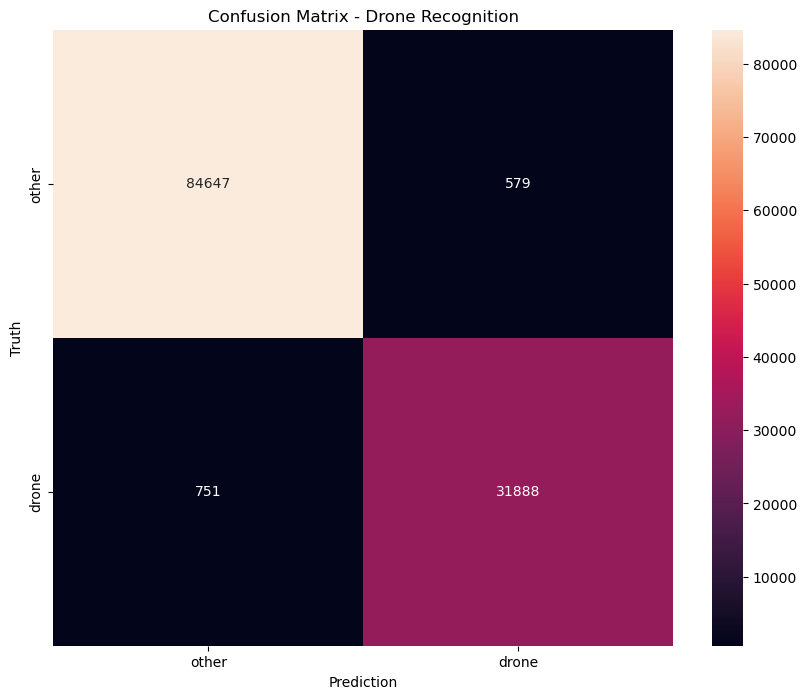

In [50]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

print(classification_report(y_true, y_pred, target_names=LABELS.names, digits=3))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=LABELS.names, yticklabels=LABELS.names)
plt.xlabel("Prediction")
plt.ylabel("Truth")
plt.title("Confusion Matrix - Drone Recognition")
plt.show()


In [51]:
ds_test_online = load_dataset("Usernameeeeee/drone_test", split="test")
ds_test_online2 = load_dataset("Usernameeeeee/drone_test_2", split="test")


In [52]:
def swap_labels(example):
    example["label"] = 1 - example["label"]   # flips 0 ↔ 1
    return example

ds_test_online = ds_test_online.map(swap_labels)
ds_test_online2 = ds_test_online2.map(swap_labels)


In [53]:
def convert_to_linear_spectrogram(batch):
    all_linear_db = []
    all_labels = []

    for audio, label in zip(batch["audio"], batch["label"]):
        data = np.array(audio["array"])

        # ---- FIX: convertir en float32 ----
        data = data.astype(np.float32)

        # Normalisation optionnelle (mais recommandée)
        # data = data / np.max(np.abs(data) + 1e-8)

        # Compute STFT
        stft = librosa.stft(data, n_fft=2048, hop_length=512)

        # Compute magnitude
        magnitude = np.abs(stft)

        # Convert to dB
        linear_db = librosa.amplitude_to_db(magnitude, ref=np.max)

        all_linear_db.append(linear_db)
        all_labels.append(label)

    return {
        "audio": all_linear_db,
        "label": all_labels,
    }


In [54]:
import librosa

NUM_PROC = 48

ds_test_online_spec = ds_test_online.map(
    convert_to_linear_spectrogram,
    batched=True,
    num_proc=NUM_PROC,
    batch_size=BATCH_SIZE,
    remove_columns=ds_test_online.column_names,
)

ds_test_online2_spec = ds_test_online2.map(
    convert_to_linear_spectrogram,
    batched=True,
    num_proc=NUM_PROC,
    batch_size=BATCH_SIZE,
    remove_columns=ds_test_online2.column_names,
)


In [55]:
test_loader1 = DataLoader(ds_test_online_spec, batch_size=BATCH_SIZE, shuffle=True,
                          num_workers=NUM_WORKERS, collate_fn=collate_fn)

test_loader2 = DataLoader(ds_test_online2_spec, batch_size=BATCH_SIZE, shuffle=True,
                          num_workers=NUM_WORKERS, collate_fn=collate_fn)


In [56]:
y_true1, y_pred1, y_true2, y_pred2 = [], [], [], []

with torch.no_grad():
    for x, y in tqdm(test_loader1, desc="Testing"):
        x, y = x.to(DEVICE), y.to(DEVICE)
        out = model(x)
        preds = out.argmax(dim=1)
        y_true1.extend(y.cpu().numpy())
        y_pred1.extend(preds.cpu().numpy())

with torch.no_grad():
    for x, y in tqdm(test_loader2, desc="Testing"):
        x, y = x.to(DEVICE), y.to(DEVICE)
        out = model(x)
        preds = out.argmax(dim=1)
        y_true2.extend(y.cpu().numpy())
        y_pred2.extend(preds.cpu().numpy())


Testing: 100%|██████████| 88/88 [00:09<00:00,  8.96it/s]


              precision    recall  f1-score   support

       other      0.644     1.000     0.784       509
       drone      1.000     0.268     0.423       384

    accuracy                          0.685       893
   macro avg      0.822     0.634     0.603       893
weighted avg      0.797     0.685     0.629       893

              precision    recall  f1-score   support

       other      0.002     1.000     0.004         1
       drone      1.000     0.804     0.891      2804

    accuracy                          0.804      2805
   macro avg      0.501     0.902     0.448      2805
weighted avg      1.000     0.804     0.891      2805



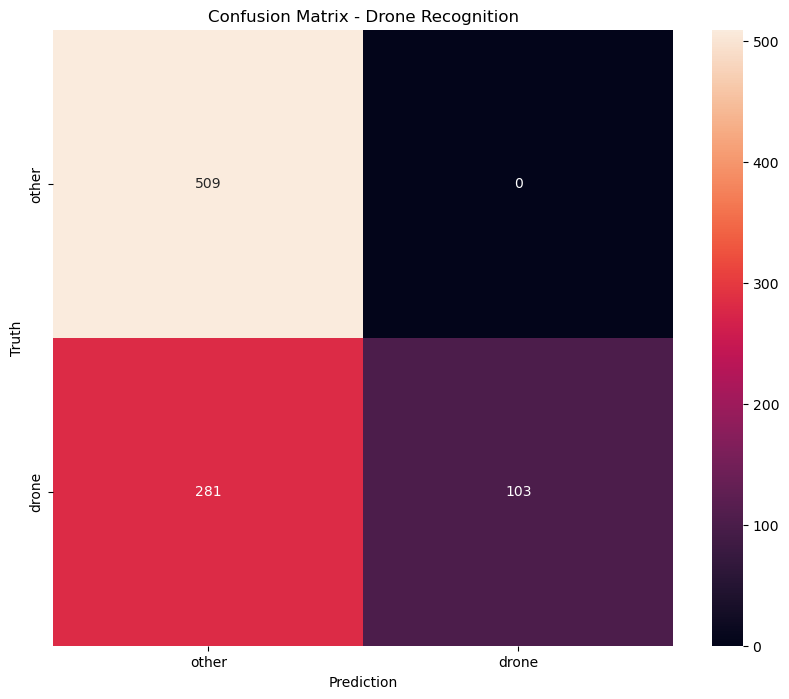

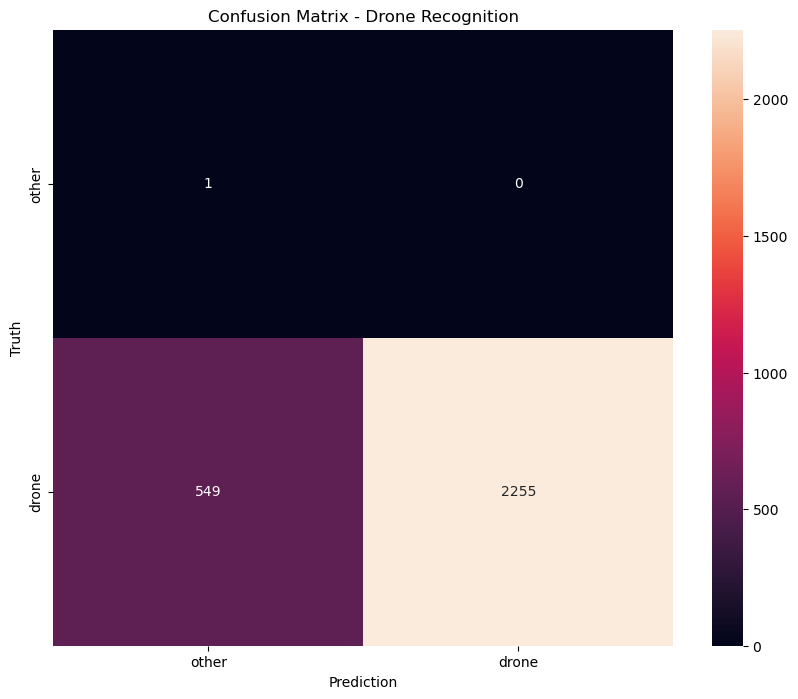

In [57]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

print(classification_report(y_true1, y_pred1, target_names=LABELS.names, digits=3))
print(classification_report(y_true2, y_pred2, target_names=LABELS.names, digits=3))

cm1, cm2 = confusion_matrix(y_true1, y_pred1), confusion_matrix(y_true2, y_pred2)
plt.figure(figsize=(10,8))
sns.heatmap(cm1, annot=True, fmt="d", xticklabels=LABELS.names, yticklabels=LABELS.names)
plt.xlabel("Prediction")
plt.ylabel("Truth")
plt.title("Confusion Matrix - Drone Recognition")
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(cm2, annot=True, fmt="d", xticklabels=LABELS.names, yticklabels=LABELS.names)
plt.xlabel("Prediction")
plt.ylabel("Truth")
plt.title("Confusion Matrix - Drone Recognition")
plt.show()


In [20]:
print(ds["train"].features["label"])


ClassLabel(names=['other', 'drone'])


In [28]:
print(ds_test_online_spec.features["label"])
print(ds_test_online2_spec.features["label"])


ClassLabel(names=['drone', 'other'])
ClassLabel(names=['drone', 'other'])


In [30]:
print(ds_test_online[0]["label"])


1


In [32]:
print(ds_test_online[0]["label"])


0


In [30]:
print(ds_test_online[0]["label"])


1


In [32]:
print(ds_test_online[0]["label"])


0
